# **SVM REGRESI ATAU SUPER VECTOR REGRESSION (SVR)**

## **Import Libraries**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **Preprocessing Data**

In [4]:
# Importing the dataset
dataset = pd.read_csv("Student_Marks.csv")

# Read the dataset
dataset

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


**- Pengecekan tipe data**

In [5]:
# Jenis tipe data tiap kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


**- Missing value**

In [6]:
# Mengecek jumlah nilai yang hilang (missing value) dalam setiap kolom DataFrame
dataset.isna().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

**- Korelasi**

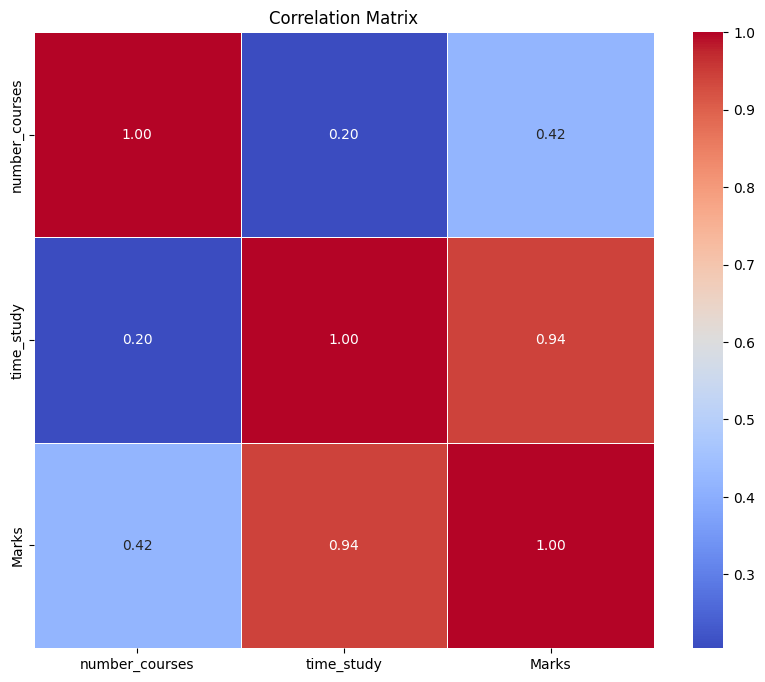

In [7]:
# Generate matriks korelasi
correlation_matrix = dataset.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## **Membangun Model**

In [8]:
# Hapus outliers dengan z-score method
z_scores = np.abs(stats.zscore(dataset))
threshold = 3
cleaned_data = dataset[(z_scores < threshold).all(axis=1)]

In [28]:
# Split data menjadi features (X) dan target variable (y)
X = dataset.iloc[:, 1].values.reshape(-1, 1)
Y = dataset.iloc[:, 2].values

In [29]:
# Apply StandardScaler to standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
#spillting dataset untuk traaining dan testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
# Fitting Regression model to the dataset
regressor = SVR(kernel='linear')
regressor.fit(X, Y.ravel())

SVR(kernel='linear')

In [32]:
# Predicting a new result
y_pred = regressor.predict(X)

In [36]:
# Hitung Mean Absolute Error (MAE)
mae = mean_absolute_error(Y, y_pred)

# Hitung Mean Squared Error (MSE)
mse = mean_squared_error(Y, y_pred)

# Hitung Root Mean Squared Error (RMSE)
rmse = mean_squared_error(Y, y_pred, squared=False)

# Mengukur R^2 score untuk akurasi model regresi
r2 = r2_score(Y, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 3.875983538503933
Mean Squared Error: 23.01383930302437
Root Mean Squared Error: 4.79727415341508
R^2 Score: 0.8867359859912022


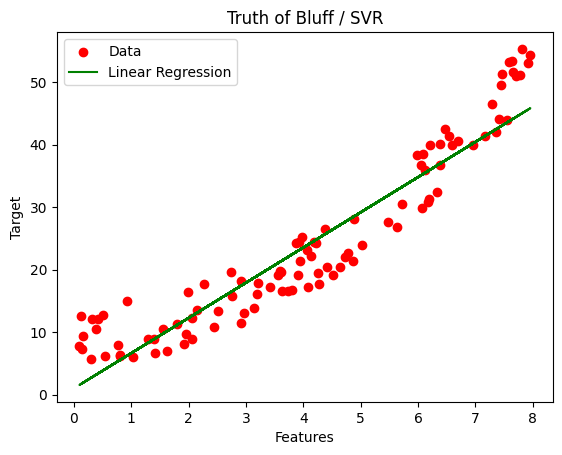

In [37]:
# Visualization the regression result
plt.scatter(X[:, 0], Y, color='red', label='Data')
plt.plot(X[:, 0], y_pred, color='green', label='Linear Regression')
plt.title('Truth of Bluff / SVR')
plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()
plt.show()